In [3]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import TensorDataset, DataLoader

ModuleNotFoundError: No module named 'torch'

In [ ]:
data = pd.read_csv('/Users/sb/Desktop/anomaly_forecast/data/asos_105_crop.csv')

In [46]:
train=pd.read_csv("asos_105_train1.csv")
test=pd.read_csv("asos_105_test1.csv")

In [47]:
train=train.drop(['일시'],axis=1)
test=test.drop(['일시'],axis=1)

In [48]:
y_train=train['강수량(mm)']
x_train=train.drop('강수량(mm)',axis=1)
y_test=test['강수량(mm)']
x_test=test.drop('강수량(mm)',axis=1)

In [49]:
x_train

,기온(°C),풍속(m/s),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),sin_풍향(16방위)_1,con_풍향(16방위)_1,month,season
0,2.9,4.3,0.36,2.7,-10.7,26.6,29.9,2.000,1.7,2.5,2.5,4.6,5.2,-0.939693,3.420201e-01,1,0
1,2.6,4.6,0.35,2.6,-11.3,26.2,29.5,2.000,1.3,2.4,2.3,4.6,5.2,-0.939693,3.420201e-01,1,0
2,2.3,3.7,0.34,2.5,-11.9,26.2,29.5,2.000,1.0,2.2,2.0,4.5,5.2,-0.939693,3.420201e-01,1,0
3,2.5,4.5,0.33,2.4,-12.1,26.6,29.9,2.000,1.3,2.0,1.8,4.4,5.2,-0.939693,3.420201e-01,1,0
4,2.6,4.3,0.30,2.2,-13.2,26.1,29.4,2.000,1.4,2.0,1.8,4.4,5.2,-0.642788,7.660444e-01,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62993,7.1,2.1,0.48,4.9,-3.1,23.7,27.1,4.001,6.0,7.7,9.8,10.2,9.8,-1.000000,-1.836970e-16,3,0
62994,5.9,2.1,0.50,4.6,-3.7,24.2,27.6,4.534,5.1,6.9,9.3,9.9,9.8,-1.000000,-1.836970e-16,3,0
62995,5.2,1.7,0.52,4.6,-3.8,23.9,27.3,4.729,4.4,6.3,8.8,9.6,9.8,-1.000000,-1.836970e-16,3,0
62996,4.5,1.8,0.51,4.3,-4.7,23.9,27.3,4.883,3.9,5.9,8.4,9.3,9.7,-1.000000,-1.836970e-16,3,0


In [50]:
# data tensor로 바꾸기
x_train=torch.tensor(x_train.values,dtype=torch.float32)
y_train=torch.tensor(y_train.values,dtype=torch.float32)
x_test=torch.tensor(x_test.values,dtype=torch.float32)
y_test=torch.tensor(y_test.values,dtype=torch.float32)

In [51]:

train_dataset=TensorDataset(x_train,y_train)
test_dataset=TensorDataset(x_test,y_test)

train_loader=DataLoader(train_dataset, batch_size=500, shuffle=False)
test_loader=DataLoader(test_dataset, shuffle=False)

In [52]:
class WeatherForecastModel(nn.Module):
    def __init__(self):
        super(WeatherForecastModel, self).__init__()
        self.hidden_layer1 = nn.Linear(17, 32)
        self.hidden_layer2 = nn.Linear(32, 64)
        self.hidden_layer3 = nn.Linear(64, 128)
        self.hidden_layer4 = nn.Linear(128, 256)
        self.hidden_layer5 = nn.Linear(256, 128)
        self.hidden_layer6 = nn.Linear(128, 64)
        self.hidden_layer7 = nn.Linear(64, 32)
        self.hidden_layer8 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.hidden_layer1(x))
        x = torch.relu(self.hidden_layer2(x))
        x = torch.relu(self.hidden_layer3(x))
        x = torch.relu(self.hidden_layer4(x))
        x = torch.relu(self.hidden_layer5(x))
        x = torch.relu(self.hidden_layer6(x))
        x = torch.relu(self.hidden_layer7(x))
        x = self.hidden_layer8(x)
        return x

# Create an instance of the model
weather_forecast_model = WeatherForecastModel()

In [53]:
weather_forecast_model

WeatherForecastModel(
  (hidden_layer1): Linear(in_features=17, out_features=32, bias=True)
  (hidden_layer2): Linear(in_features=32, out_features=64, bias=True)
  (hidden_layer3): Linear(in_features=64, out_features=128, bias=True)
  (hidden_layer4): Linear(in_features=128, out_features=256, bias=True)
  (hidden_layer5): Linear(in_features=256, out_features=128, bias=True)
  (hidden_layer6): Linear(in_features=128, out_features=64, bias=True)
  (hidden_layer7): Linear(in_features=64, out_features=32, bias=True)
  (hidden_layer8): Linear(in_features=32, out_features=1, bias=True)
)

In [54]:
optimizer=torch.optim.AdamW(params=weather_forecast_model.parameters(),lr=1e-5)
scheduler=torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=2, threshold_mode='rel', min_lr=1e-8, verbose=True )
criterion=nn.MSELoss()

c:\Users\PC\anaconda3\envs\tad\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [55]:
for epoch in range(100):
    weather_forecast_model.train()
    loss_values=0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs=weather_forecast_model(inputs)
        loss=criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        loss_values+=loss.item() * inputs.size(0)
    
    weather_forecast_model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = weather_forecast_model(x_test)
        val_loss = criterion(val_outputs, y_test)
    
    # Print epoch statistics
    print(f"Epoch {epoch+1}/{500}, Loss: {loss_values/len(train_dataset)}, Val Loss: {val_loss.item()}")

c:\Users\PC\anaconda3\envs\tad\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([500])) that is different to the input size (torch.Size([500, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\PC\anaconda3\envs\tad\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([498])) that is different to the input size (torch.Size([498, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\PC\anaconda3\envs\tad\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8760])) that is different to the input size (torch.Size([8760, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the sa

Epoch 1/500, Loss: 1.7438199655499527, Val Loss: 1.9929803609848022
Epoch 2/500, Loss: 1.7410469694483683, Val Loss: 1.9914997816085815
Epoch 3/500, Loss: 1.738796125081291, Val Loss: 1.990592360496521
Epoch 4/500, Loss: 1.7367002210370805, Val Loss: 1.9902151823043823
Epoch 5/500, Loss: 1.7349635647274129, Val Loss: 1.990400791168213
Epoch 6/500, Loss: 1.7336544882136076, Val Loss: 1.990967869758606
Epoch 7/500, Loss: 1.732633076289363, Val Loss: 1.9917595386505127
Epoch 8/500, Loss: 1.7318188635577225, Val Loss: 1.992577314376831
Epoch 9/500, Loss: 1.7311866746318572, Val Loss: 1.9933477640151978
Epoch 10/500, Loss: 1.7306964008089745, Val Loss: 1.994066596031189
Epoch 11/500, Loss: 1.730307271274207, Val Loss: 1.9947388172149658
Epoch 12/500, Loss: 1.729980596516967, Val Loss: 1.995398998260498
Epoch 13/500, Loss: 1.7296949143802165, Val Loss: 1.996017575263977
Epoch 14/500, Loss: 1.7294542758469447, Val Loss: 1.9965664148330688
Epoch 15/500, Loss: 1.729248266485913, Val Loss: 1.997

In [56]:
weather_forecast_model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predict = weather_forecast_model(x_test)


In [57]:
predict=predict.reshape(-1)
predict=np.exp(predict)

In [58]:
y_test.size()

torch.Size([8760])

In [59]:
predict.size()

torch.Size([8760])

In [60]:
predict

tensor([1.0804, 1.0758, 1.0753,  ..., 1.1084, 1.0803, 1.0820])

In [61]:
y_test.mean()

tensor(0.1909)

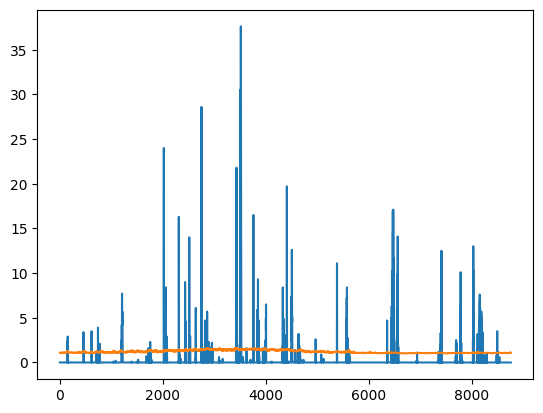

In [62]:
plt.plot(y_test)
plt.plot(predict)
plt.show()